In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
insurance_data = pd.read_csv("D:/dataset/insurance.csv")

In [11]:
insurance_data.head()

,age,gender,bmi,children,smoker,region,Premium
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [20]:
insurance_data.shape

(1338, 7)

In [19]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1335 non-null float64
gender      1334 non-null object
bmi         1336 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
Premium     1338 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [21]:
insurance_data.describe()

,age,bmi,children,Premium
count,1335.000000,1336.000000,1338.000000,1338.000000
mean,39.193258,30.666781,1.094918,13270.422265
std,14.032628,6.101254,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.308750,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
age = [True,False,True]

In [13]:
sum(age)

2

In [14]:
insurance_data.isnull().sum()

age         3
gender      4
bmi         2
children    0
smoker      0
region      0
Premium     0
dtype: int64

In [17]:
insurance_data[insurance_data.isnull().any(axis=1)]

,age,gender,bmi,children,smoker,region,Premium
1306,29.0,NaN,21.850,0,yes,northeast,16115.30450
1310,42.0,NaN,26.315,1,no,northwest,6940.90985
1316,19.0,NaN,20.600,0,no,southwest,1731.67700
1320,31.0,male,NaN,3,no,northwest,5425.02335
1324,31.0,NaN,25.935,1,no,northwest,4239.89265
1330,NaN,female,NaN,2,no,southeast,12629.16560
1335,NaN,female,36.850,0,no,southeast,1629.83350
1337,NaN,female,29.070,0,yes,northwest,29141.36030


In [18]:
insurance_data[insurance_data.isnull().any(axis=1)].shape

(8, 7)

In [24]:
import statistics as stat

In [27]:
stat.mode(insurance_data['gender'])

'male'

In [32]:
mean_age = np.mean(insurance_data['age'])
mean_bmi = np.mean(insurance_data['bmi'])

In [38]:
insurance_data_new = insurance_data.fillna({'age':mean_age,'gender':'male','bmi':mean_bmi})

In [39]:
insurance_data_new.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
Premium     0
dtype: int64

In [37]:
insurance_data.fillna({'age':np.mean(age)}).isnull().sum()

age         0
gender      4
bmi         2
children    0
smoker      0
region      0
Premium     0
dtype: int64

In [42]:
insurance_data['gender'].dtype

dtype('O')

In [43]:
def check_outlier(df):
    outlier = {}
    col_list = df.columns.tolist()
    for i in col_list:
        if df[i].dtype !='O':
            Q1=np.percentile(df[i],25)
            Q3=np.percentile(df[i],75)
            IQR = Q3-Q1
            upper_bound = Q3+(1.5*IQR)
            lower_bound = Q1-(1.5*IQR)
            outlier[i]=[upper_bound,lower_bound]
    return outlier

In [45]:
check_outlier(insurance_data_new)

{'age': [87.0, -9.0],
 'bmi': [47.261875, 13.746875000000001],
 'children': [5.0, -3.0],
 'Premium': [34489.350562499996, -13109.1508975]}

In [46]:
np.percentile(insurance_data_new['age'],1)

18.0

In [47]:
np.percentile(insurance_data_new['age'],99)

64.0

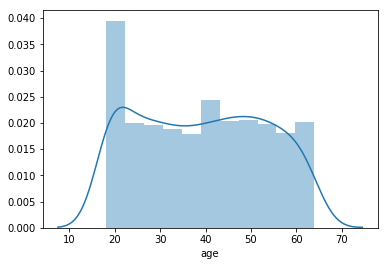

In [50]:
# Univariate analysis
sns.distplot(insurance_data_new['age'])

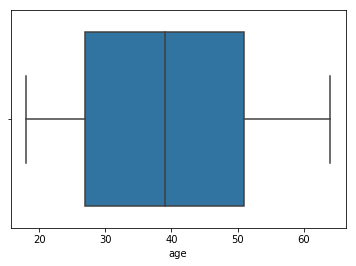

In [53]:
# Univariate analysis
sns.boxplot(x=insurance_data_new['age'])

In [54]:
insurance_data_new['gender'].value_counts()

male      678
female    660
Name: gender, dtype: int64

In [55]:
np.unique(insurance_data_new['gender'])

array(['female', 'male'], dtype=object)

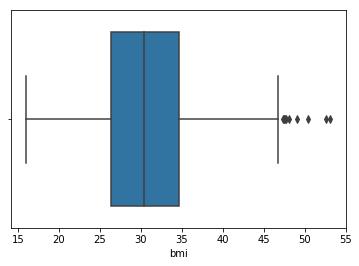

In [56]:
sns.boxplot(insurance_data_new['bmi'])

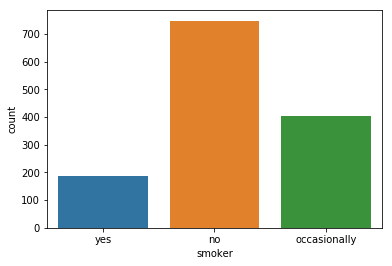

In [58]:
sns.countplot(insurance_data_new['smoker'])

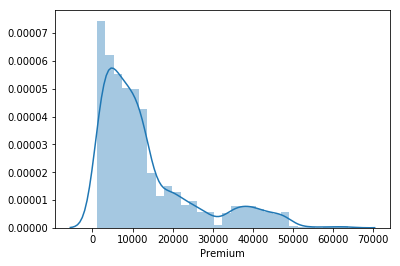

In [60]:
sns.distplot(insurance_data_new['Premium'])

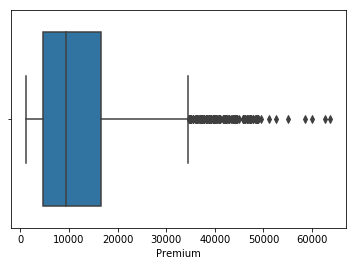

In [61]:
sns.boxplot(insurance_data_new['Premium'])

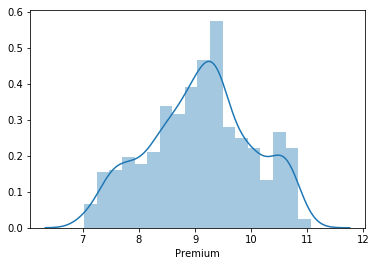

In [63]:
sns.distplot(np.log(insurance_data_new['Premium']))

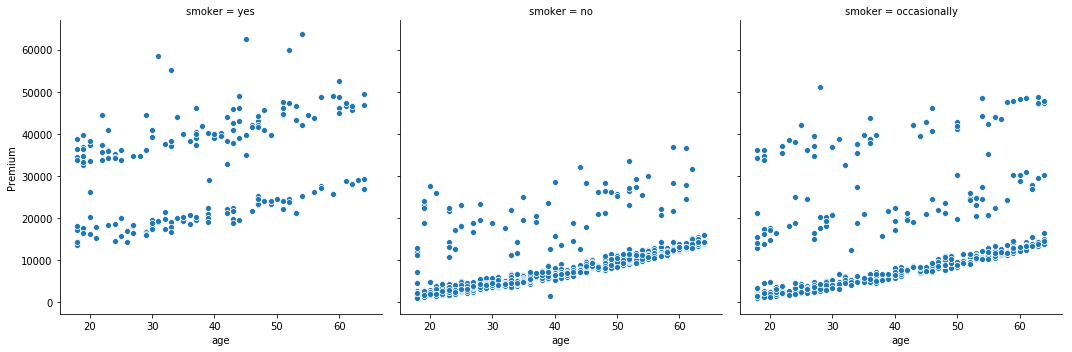

In [66]:
sns.relplot(x='age',y='Premium',col='smoker',data=insurance_data_new)

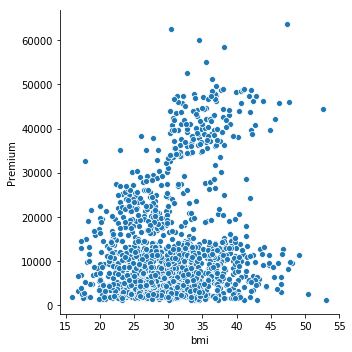

In [67]:
sns.relplot(x='bmi',y='Premium',data=insurance_data_new)

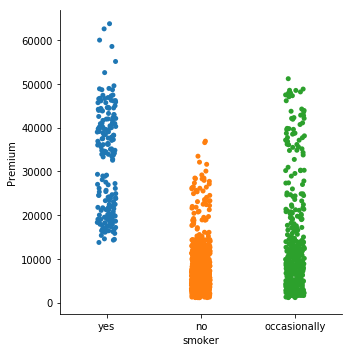

In [69]:
sns.catplot(x='smoker',y='Premium',data=insurance_data_new)

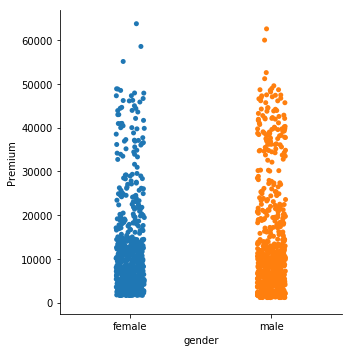

In [70]:
sns.catplot(x='gender',y='Premium',data=insurance_data_new)

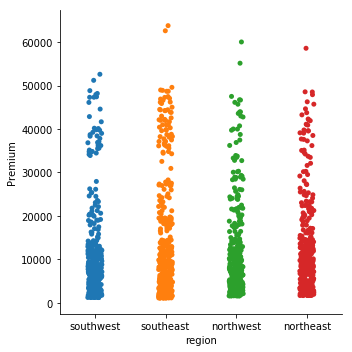

In [72]:
sns.catplot(x='region',y='Premium',data=insurance_data_new)

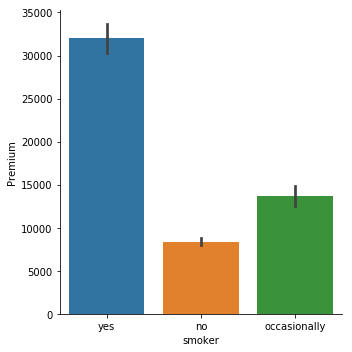

In [68]:
sns.catplot(x='smoker',y='Premium',data=insurance_data_new,kind='bar')

In [73]:
insurance_data_new.corr()

,age,bmi,children,Premium
age,1.000000,0.111804,0.041886,0.297152
bmi,0.111804,1.000000,0.013139,0.198389
children,0.041886,0.013139,1.000000,0.067998
Premium,0.297152,0.198389,0.067998,1.000000


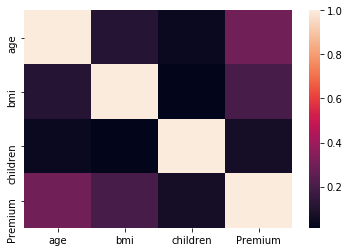

In [74]:
sns.heatmap(insurance_data_new.corr())

In [75]:
insurance_data_new['Premium']=np.log(insurance_data_new['Premium'])